<a href="https://colab.research.google.com/github/keerthibala07/Machine-learning-models-from-scratch-unsupervised/blob/main/KMeans_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np


# Initialize Centroid


In [16]:
def initialize_centriod(x,k):
  indices=np.random.choice(len(x),k,replace=False)
  return x[indices]


# Assign to clusters


In [17]:
def assign_to_clusters(x,centroids):
  distances=np.linalg.norm(x[:,np.newaxis]-centroids,axis=2)
  return np.argmin(distances,axis=1)

# update centroid


In [18]:
def update_centroids(x,labels,k):
  centroids=np.array([x[labels==i].mean(axis=0) for i in range(k)])
  return centroids


#k_Means


In [19]:
def k_mean(x,k,max_iters=100):
  centroids=initialize_centriod(x,k)
  for _ in range(max_iters):
    labels=assign_to_clusters(x,centroids)
    new_centroids=update_centroids(x,labels,k)
    if np.all(centroids==new_centroids):
      break
    centroids=new_centroids
  return labels,centroids



In [20]:
np.random.seed(42)
x=np.concatenate([np.random.normal(loc=i,scale=1,size=(50,2)) for i in range(5)])

In [21]:
x

array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

In [22]:
k=5
labels,centroids=k_mean(x,k)

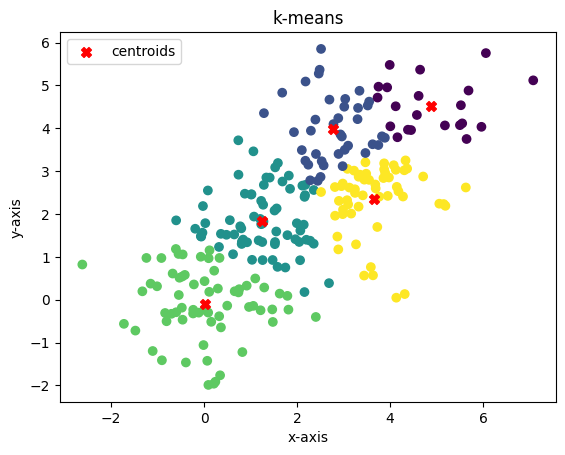

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],marker='X',s=50,c='red',label='centroids')
plt.title("k-means")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()